In [43]:
import scipy.stats as stats
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import pymc as pm

In [2]:
def post(theta, Y, alpha=1,beta=1):
    if 0 <= theta <= 1:
        prior = stats.beta(alpha,beta).pdf(theta)
        like  = stats.bernoulli(theta).pmf(Y).prod()
        prob  = like * prior
    else:
        prob = -np.inf
    return prob


In [4]:
Y = stats.bernoulli(0.7).rvs(20)

In [23]:
n_iters = 1000
can_sd = 0.05
alpha = beta = 1
theta = 0.5
trace = {}
p2 = post(theta,Y,alpha,beta)
n_chains=4

for j in range(n_chains):
    trace["theta" + str(j)] = np.zeros(n_iters)

for j in range(n_chains):
    for _ in range(n_iters):
        theta_can = stats.norm(theta,can_sd).rvs(1)
        p1 = post(theta_can, Y, alpha,beta)
        pa = p1 / p2
    
        if pa > stats.uniform(0,1).rvs(1):
            theta = theta_can
            p2 = p1
    
        trace["theta" + str(j)][_] = theta 

/tmp/ipykernel_30637/1934467248.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trace["theta" + str(j)][_] = theta


In [24]:
trace

{'theta0': array([0.52896634, 0.57541064, 0.57126589, 0.49990652, 0.48723033,
        0.47755092, 0.524194  , 0.55118892, 0.52676512, 0.53489545,
        0.53398828, 0.53398828, 0.47031463, 0.51195632, 0.49588249,
        0.49665818, 0.48391217, 0.54715204, 0.55402121, 0.52003442,
        0.54575713, 0.53121136, 0.53605832, 0.55081576, 0.56063223,
        0.45568397, 0.49375598, 0.44912478, 0.44435148, 0.50815508,
        0.54941217, 0.54239437, 0.50159938, 0.51330183, 0.54255227,
        0.54255227, 0.6454298 , 0.62438994, 0.68251661, 0.5960463 ,
        0.5284373 , 0.52091886, 0.54196054, 0.48694545, 0.44194373,
        0.44194373, 0.49483589, 0.49483589, 0.42888155, 0.40131552,
        0.40131552, 0.51798185, 0.53708995, 0.50477073, 0.52600629,
        0.53957837, 0.60790112, 0.69396582, 0.68494269, 0.63908159,
        0.70053583, 0.76895452, 0.77468524, 0.77468524, 0.72357592,
        0.66456285, 0.63771673, 0.66794418, 0.66794418, 0.7709628 ,
        0.72370141, 0.70832462, 0.6720

In [25]:
az.summary(trace,kind="stats",round_to=3)

mean     sd  hdi_3%  hdi_97%
theta0  0.577  0.094   0.420    0.752
theta1  0.588  0.114   0.381    0.791
theta2  0.608  0.103   0.447    0.810
theta3  0.583  0.114   0.348    0.764

(array([0.13161394, 0.64161794, 1.05291149, 2.30324389, 3.07647577,
        3.06002403, 2.91195835, 2.04001602, 0.92129756, 0.3125831 ]),
 array([0.26470742, 0.32549126, 0.38627509, 0.44705893, 0.50784277,
        0.5686266 , 0.62941044, 0.69019428, 0.75097811, 0.81176195,
        0.87254578]),
 <BarContainer object of 10 artists>)

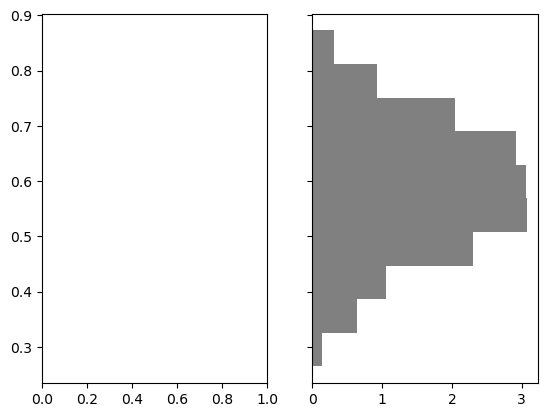

In [26]:
_,axes = plt.subplots(1,2,sharey=True)
axes[1].hist(trace["theta1"],color="0.5",orientation="horizontal",density=True)

array([[<AxesSubplot:title={'center':'theta0'}>,
        <AxesSubplot:title={'center':'theta0'}>],
       [<AxesSubplot:title={'center':'theta1'}>,
        <AxesSubplot:title={'center':'theta1'}>],
       [<AxesSubplot:title={'center':'theta2'}>,
        <AxesSubplot:title={'center':'theta2'}>],
       [<AxesSubplot:title={'center':'theta3'}>,
        <AxesSubplot:title={'center':'theta3'}>]], dtype=object)

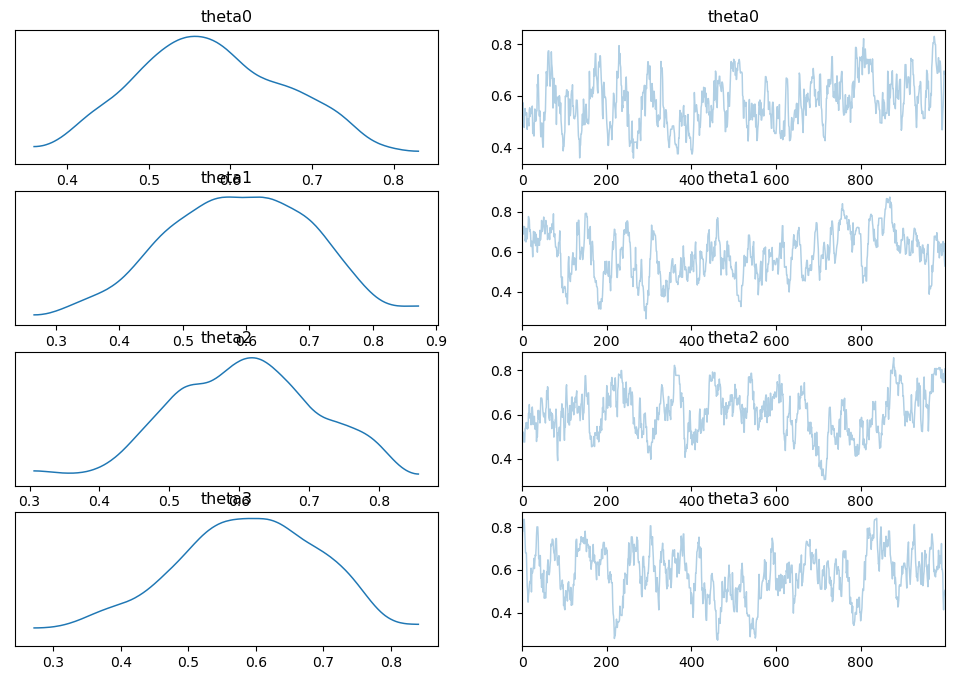

In [27]:
az.plot_trace(trace)

In [13]:
trace["theta"]

array([0.59035754, 0.6439678 , 0.57800689, 0.57337985, 0.57066094,
       0.58962874, 0.58962874, 0.53028899, 0.5274963 , 0.55474893,
       0.54041249, 0.59630533, 0.56708475, 0.51832379, 0.59014019,
       0.61573546, 0.61283569, 0.56187374, 0.56187374, 0.59591861,
       0.57549136, 0.53592169, 0.51450921, 0.51450921, 0.5131342 ,
       0.57084579, 0.54959377, 0.53442546, 0.54021905, 0.5446252 ,
       0.57607474, 0.53349047, 0.55811438, 0.54482667, 0.5425133 ,
       0.45196855, 0.43782461, 0.45210227, 0.48467139, 0.48817274,
       0.46679512, 0.55491305, 0.61698162, 0.61896147, 0.62658884,
       0.64612263, 0.67512305, 0.67512305, 0.73727619, 0.71276499,
       0.65925669, 0.61822524, 0.57978336, 0.62298171, 0.62298171,
       0.62478963, 0.67386887, 0.7354816 , 0.7020035 , 0.7020035 ,
       0.68945565, 0.70438893, 0.75309481, 0.75309481, 0.76199722,
       0.83005863, 0.79884926, 0.76423854, 0.76423854, 0.76423854,
       0.76423854, 0.69780465, 0.72721045, 0.72721045, 0.73401

array([<AxesSubplot:title={'center':'theta0'}>,
       <AxesSubplot:title={'center':'theta1'}>,
       <AxesSubplot:title={'center':'theta2'}>,
       <AxesSubplot:title={'center':'theta3'}>], dtype=object)

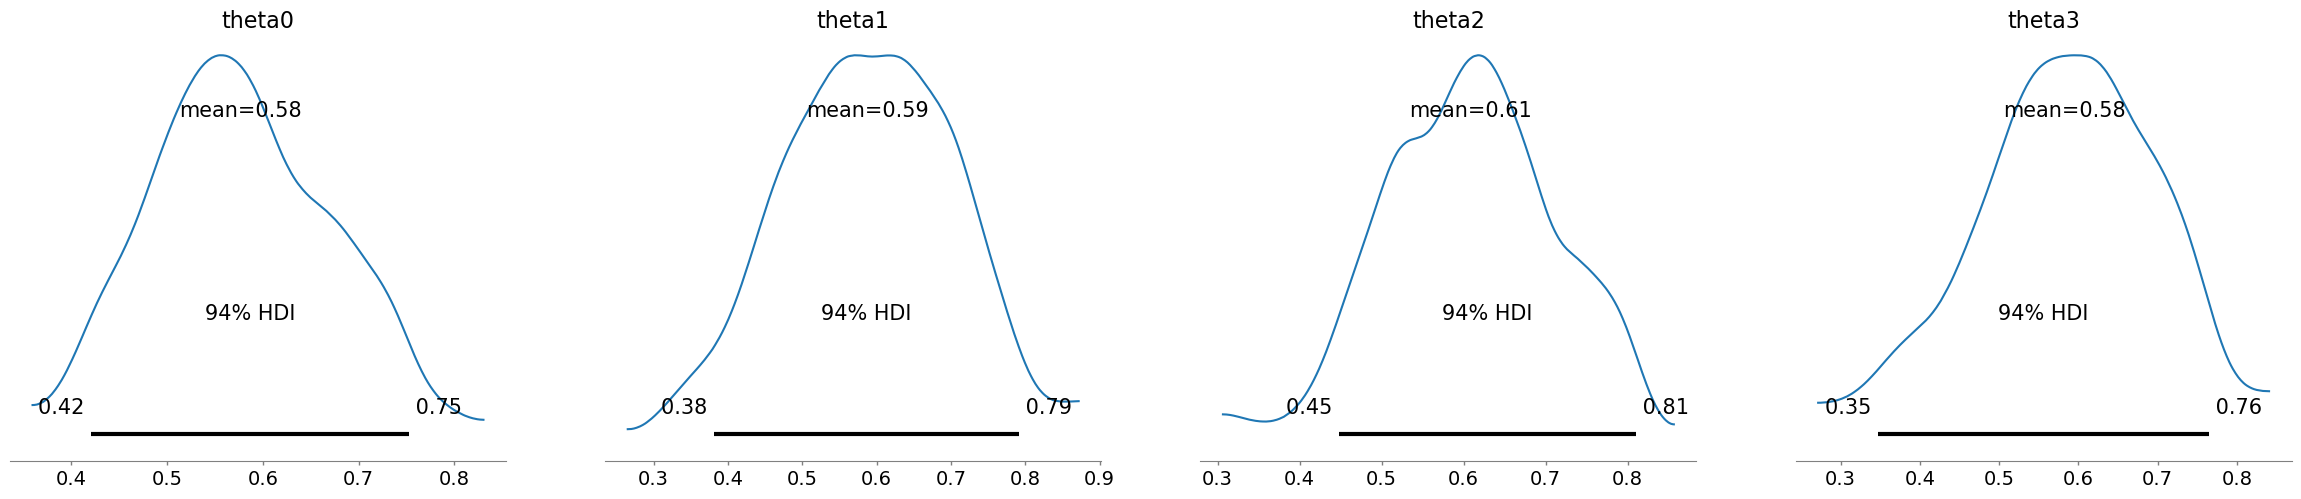

In [28]:
az.plot_posterior(trace)

In [33]:
az.rhat(trace)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    theta0   float64 nan
    theta1   float64 nan
    theta2   float64 nan
    theta3   float64 nan

In [34]:
az.summary(trace,kind="diagnostics")

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
theta0      0.017    0.012      28.0      84.0    NaN
theta1      0.025    0.018      21.0      66.0    NaN
theta2      0.017    0.012      38.0      76.0    NaN
theta3      0.017    0.012      48.0      84.0    NaN

array([[<AxesSubplot:title={'center':'theta0'}>,
        <AxesSubplot:title={'center':'theta0'}>],
       [<AxesSubplot:title={'center':'theta1'}>,
        <AxesSubplot:title={'center':'theta1'}>],
       [<AxesSubplot:title={'center':'theta2'}>,
        <AxesSubplot:title={'center':'theta2'}>],
       [<AxesSubplot:title={'center':'theta3'}>,
        <AxesSubplot:title={'center':'theta3'}>]], dtype=object)

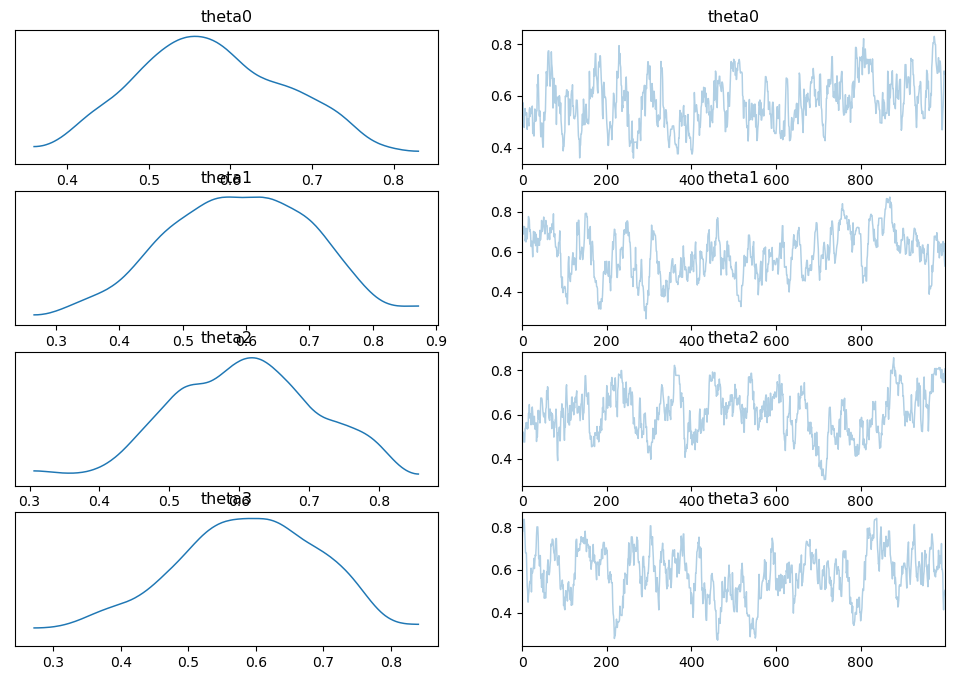

In [35]:
az.plot_trace(trace)

array([<AxesSubplot:title={'center':'theta0'}, xlabel='Rank (all chains)'>,
       <AxesSubplot:title={'center':'theta1'}, xlabel='Rank (all chains)'>,
       <AxesSubplot:title={'center':'theta2'}, xlabel='Rank (all chains)'>,
       <AxesSubplot:title={'center':'theta3'}, xlabel='Rank (all chains)'>],
      dtype=object)

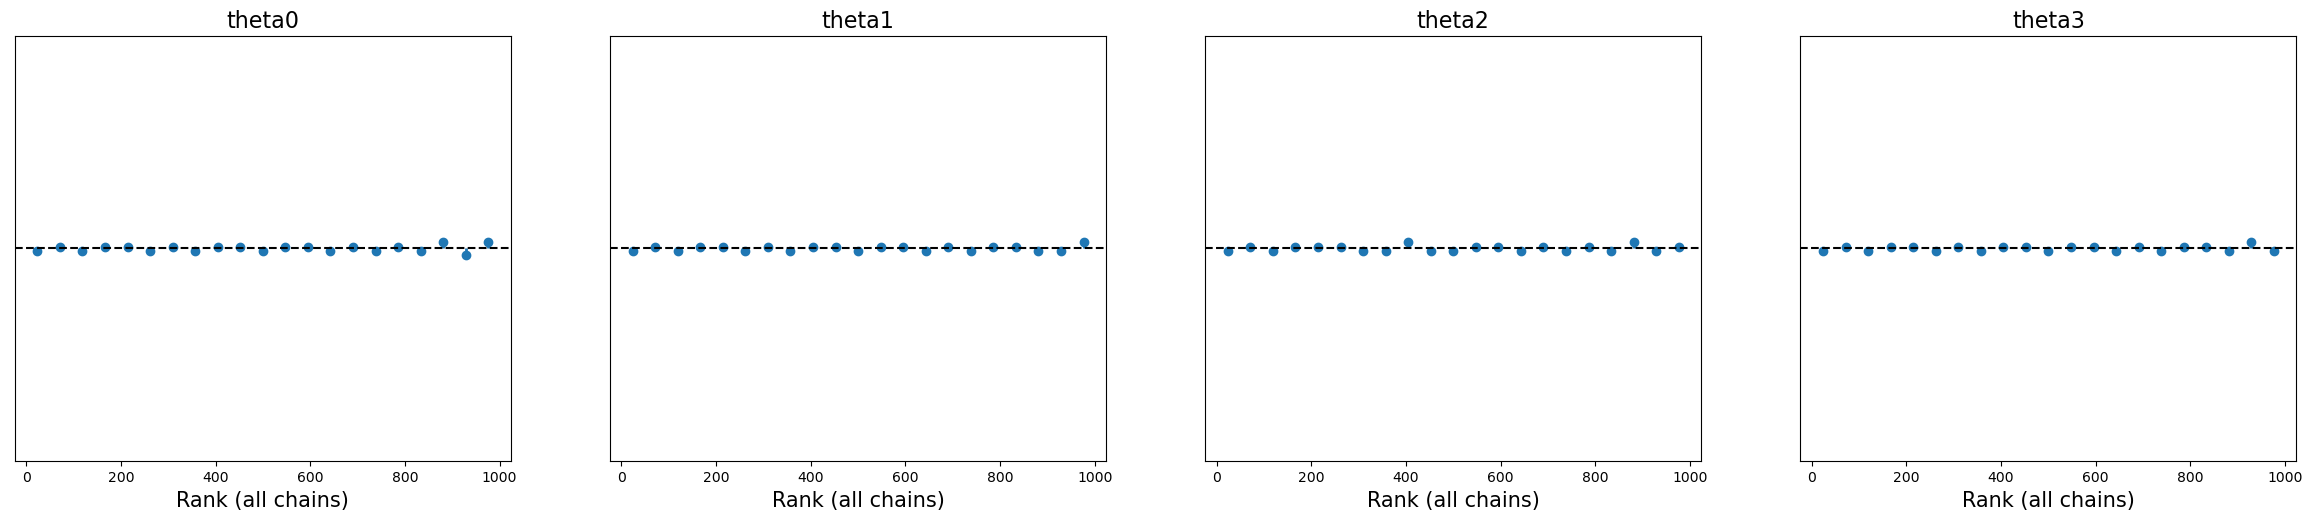

In [36]:
az.plot_rank(trace,kind="vlines")

In [38]:
az.ess(trace)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    theta0   float64 27.79
    theta1   float64 20.7
    theta2   float64 37.58
    theta3   float64 47.53

/home/netphaadmin/anaconda3/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


array([<AxesSubplot:title={'center':'theta0'}, xlabel='Quantile', ylabel='ESS for small intervals'>,
       <AxesSubplot:title={'center':'theta1'}, xlabel='Quantile', ylabel='ESS for small intervals'>,
       <AxesSubplot:title={'center':'theta2'}, xlabel='Quantile', ylabel='ESS for small intervals'>,
       <AxesSubplot:title={'center':'theta3'}, xlabel='Quantile', ylabel='ESS for small intervals'>],
      dtype=object)

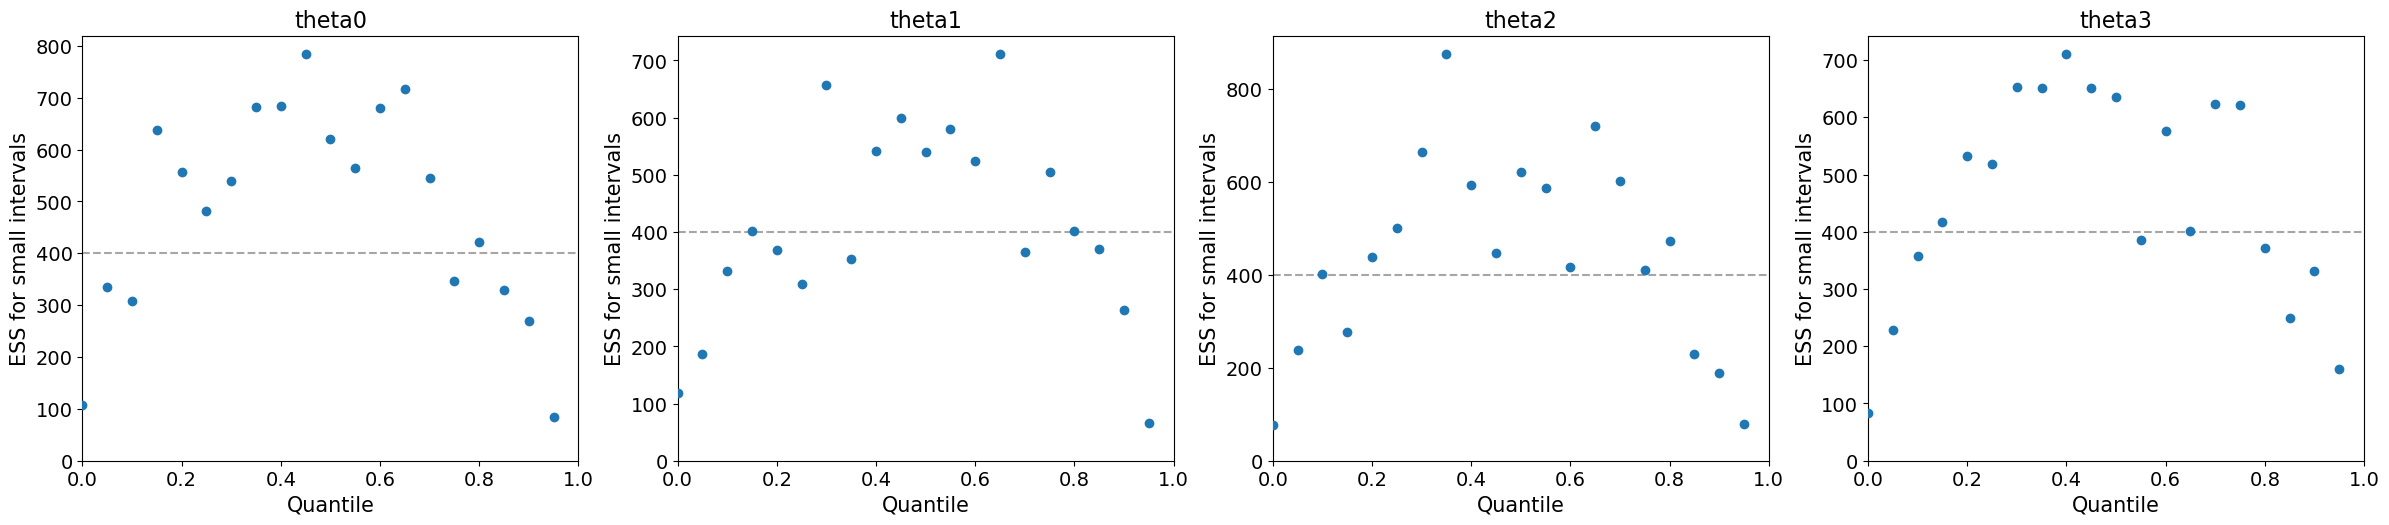

In [39]:
az.plot_ess(trace,kind="local")

/home/netphaadmin/anaconda3/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


array([<AxesSubplot:title={'center':'theta0'}, xlabel='Quantile', ylabel='ESS for quantiles'>,
       <AxesSubplot:title={'center':'theta1'}, xlabel='Quantile', ylabel='ESS for quantiles'>,
       <AxesSubplot:title={'center':'theta2'}, xlabel='Quantile', ylabel='ESS for quantiles'>,
       <AxesSubplot:title={'center':'theta3'}, xlabel='Quantile', ylabel='ESS for quantiles'>],
      dtype=object)

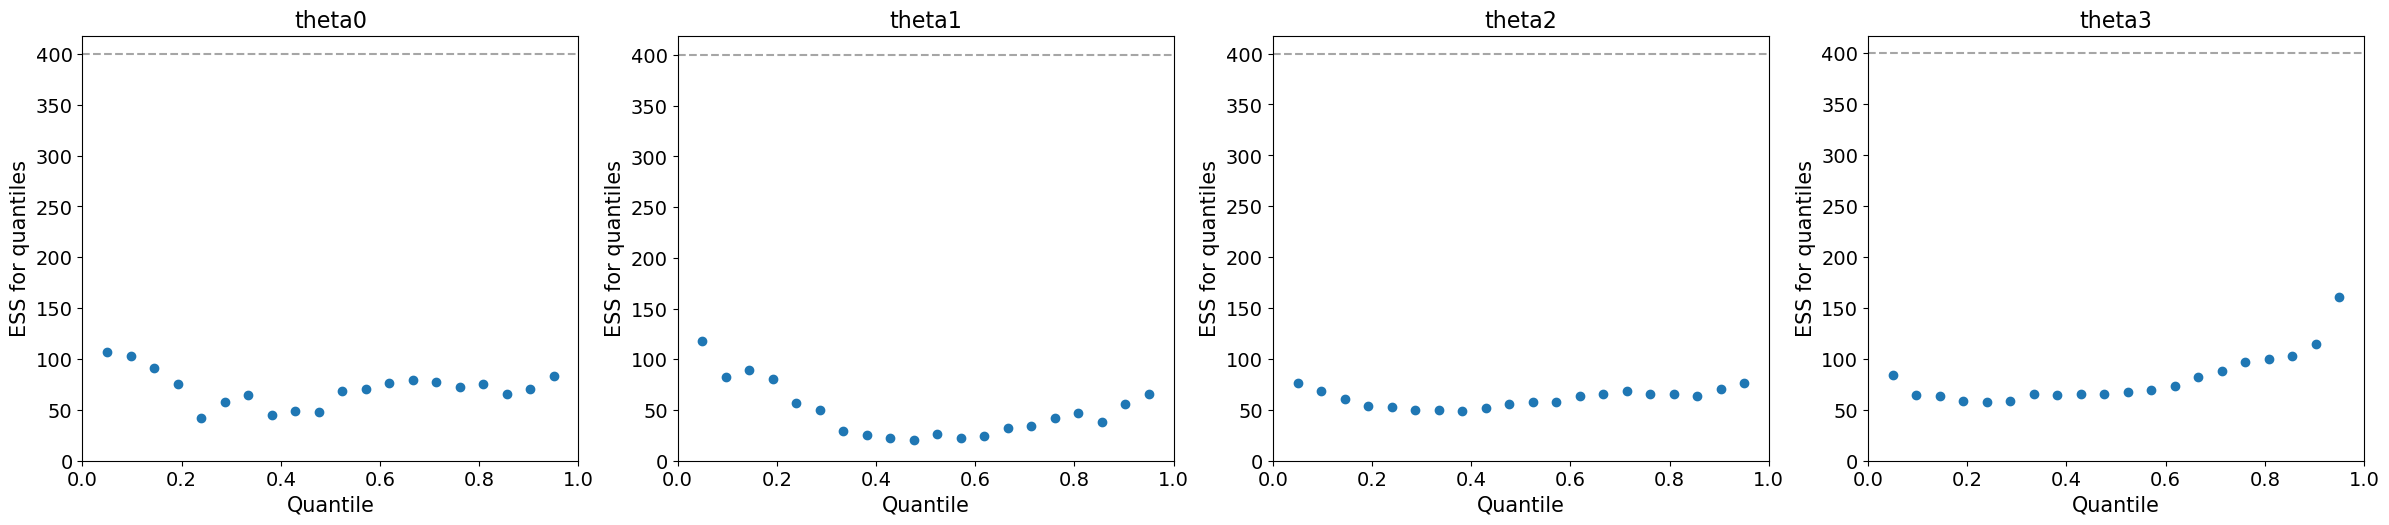

In [40]:
az.plot_ess(trace,kind="quantile")

array([<AxesSubplot:title={'center':'theta0\n0'}>,
       <AxesSubplot:title={'center':'theta1\n0'}>,
       <AxesSubplot:title={'center':'theta2\n0'}>,
       <AxesSubplot:title={'center':'theta3\n0'}>], dtype=object)

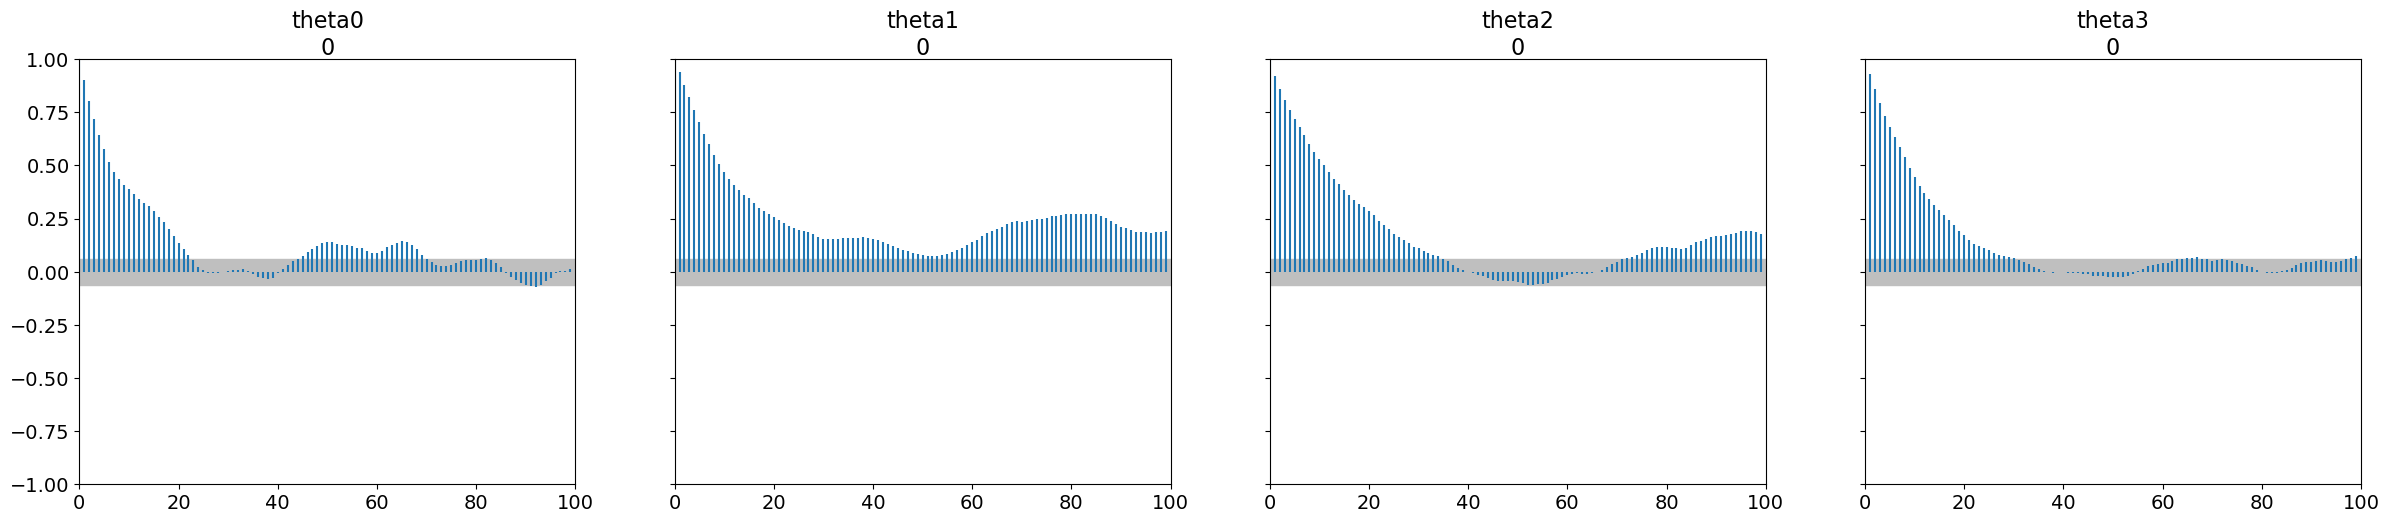

In [41]:
az.plot_autocorr(trace)

/home/netphaadmin/anaconda3/lib/python3.9/site-packages/arviz/plots/pairplot.py:223: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(
/home/netphaadmin/anaconda3/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


array([[<AxesSubplot:ylabel='theta1'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='theta2'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='theta0', ylabel='theta3'>,
        <AxesSubplot:xlabel='theta1'>, <AxesSubplot:xlabel='theta2'>]],
      dtype=object)

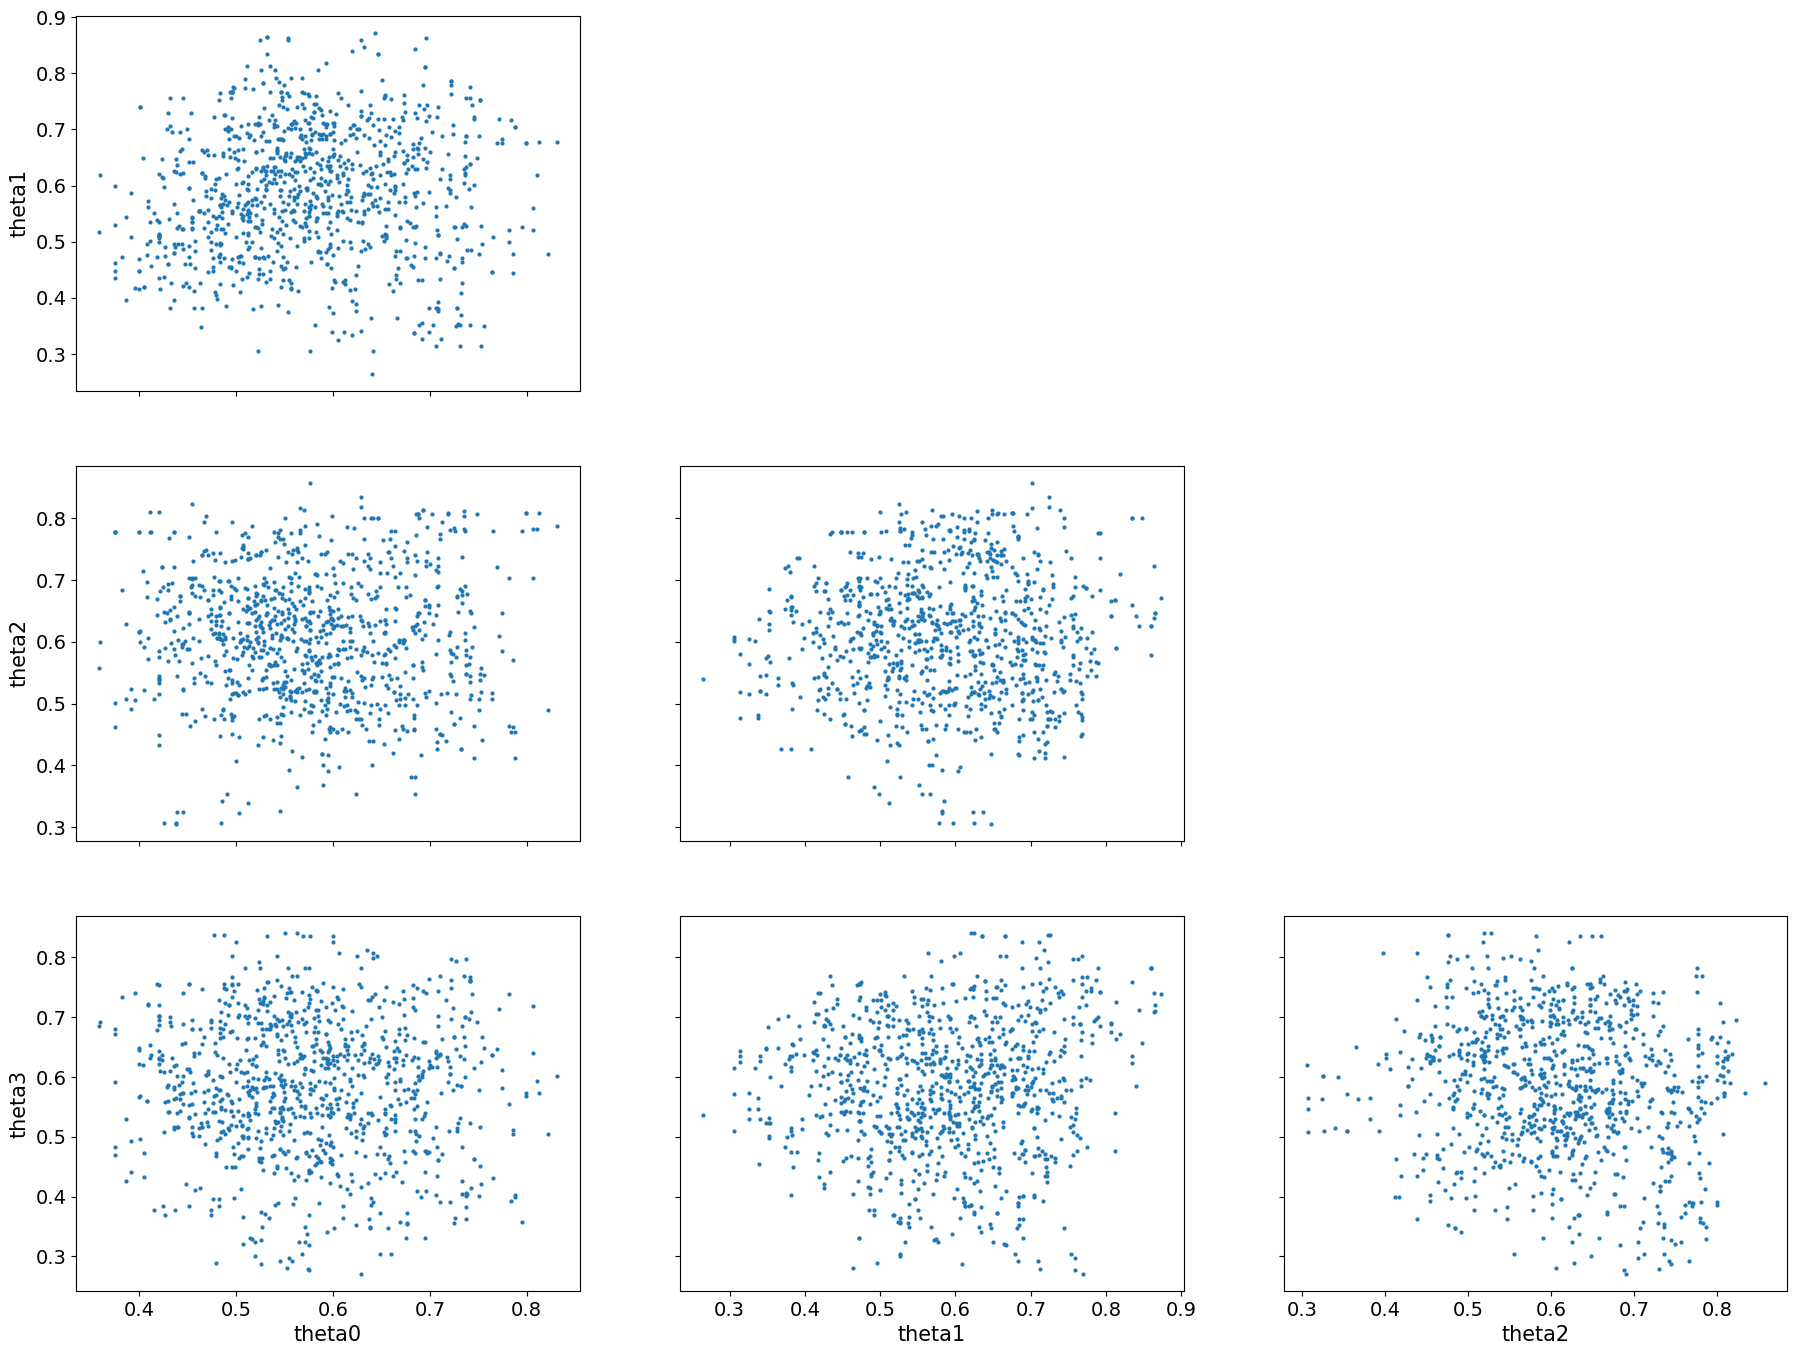

In [42]:
az.plot_pair(trace,divergences=True)

In [ ]:
#mackay example

In [75]:
y_obs = [1,18,3,11,14,7,12]
with pm.Model() as model:
    n1 = pm.HalfNormal("n1",10)
    y = pm.Exponential("y", lam=n1, observed=y_obs)
    idata = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [66]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

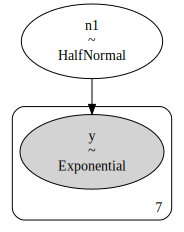

In [86]:
pm.model_to_graphviz(model)

array([[<AxesSubplot:title={'center':'n1'}>,
        <AxesSubplot:title={'center':'n1'}>]], dtype=object)

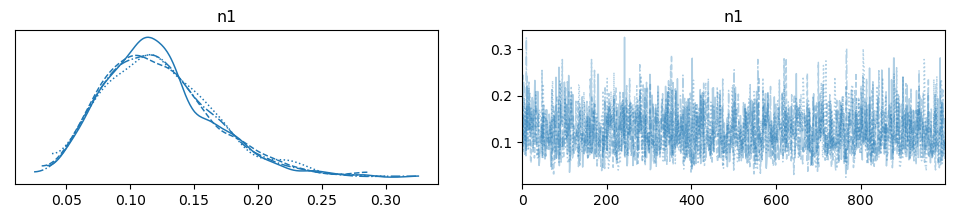

In [76]:
az.plot_trace(idata)

<AxesSubplot:title={'center':'n1'}, xlabel='Rank (all chains)', ylabel='Chain'>

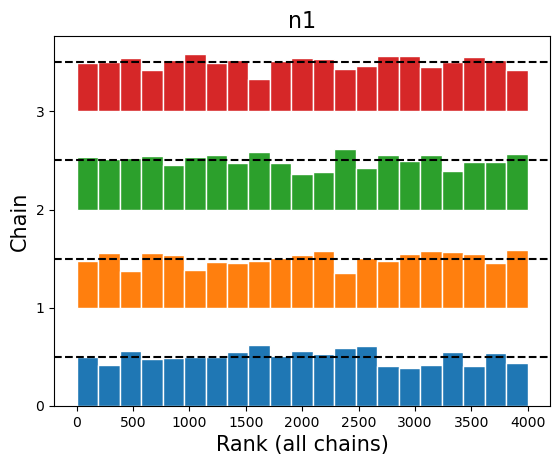

In [82]:
az.plot_rank(idata)

<AxesSubplot:title={'center':'n1'}, xlabel='Rank (all chains)'>

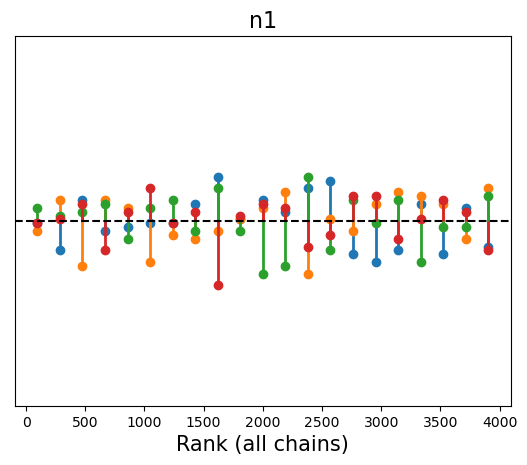

In [83]:
az.plot_rank(idata,kind="vlines")

<AxesSubplot:title={'center':'n1'}>

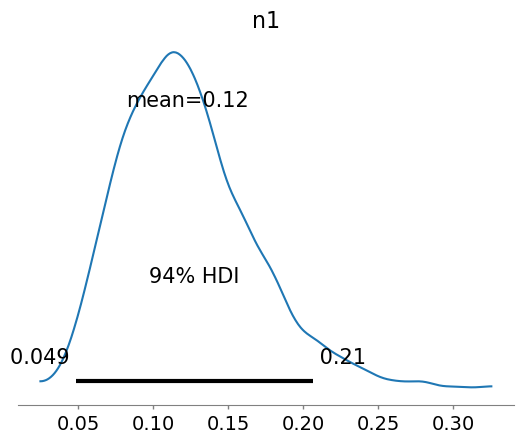

In [77]:
az.plot_posterior(idata)

In [78]:
az.ess(idata)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    n1       float64 1.484e+03

/home/netphaadmin/anaconda3/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
/home/netphaadmin/anaconda3/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


<AxesSubplot:title={'center':'n1'}, xlabel='Quantile', ylabel='ESS for quantiles'>

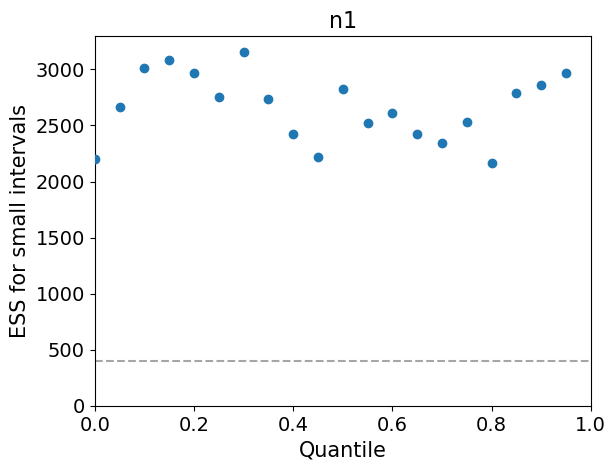

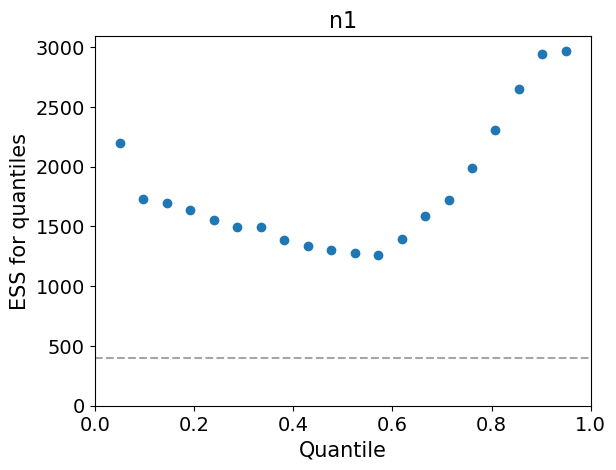

In [79]:
az.plot_ess(idata,kind="local")
az.plot_ess(idata,kind="quantile")

In [87]:
az.plot_pair(idata.posterior.chain,divergences=True)

ValueError: cannot create a Dataset from a DataArray with the same name as one of its coordinates

array([<AxesSubplot:title={'center':'n1\n0'}>,
       <AxesSubplot:title={'center':'n1\n1'}>,
       <AxesSubplot:title={'center':'n1\n2'}>,
       <AxesSubplot:title={'center':'n1\n3'}>], dtype=object)

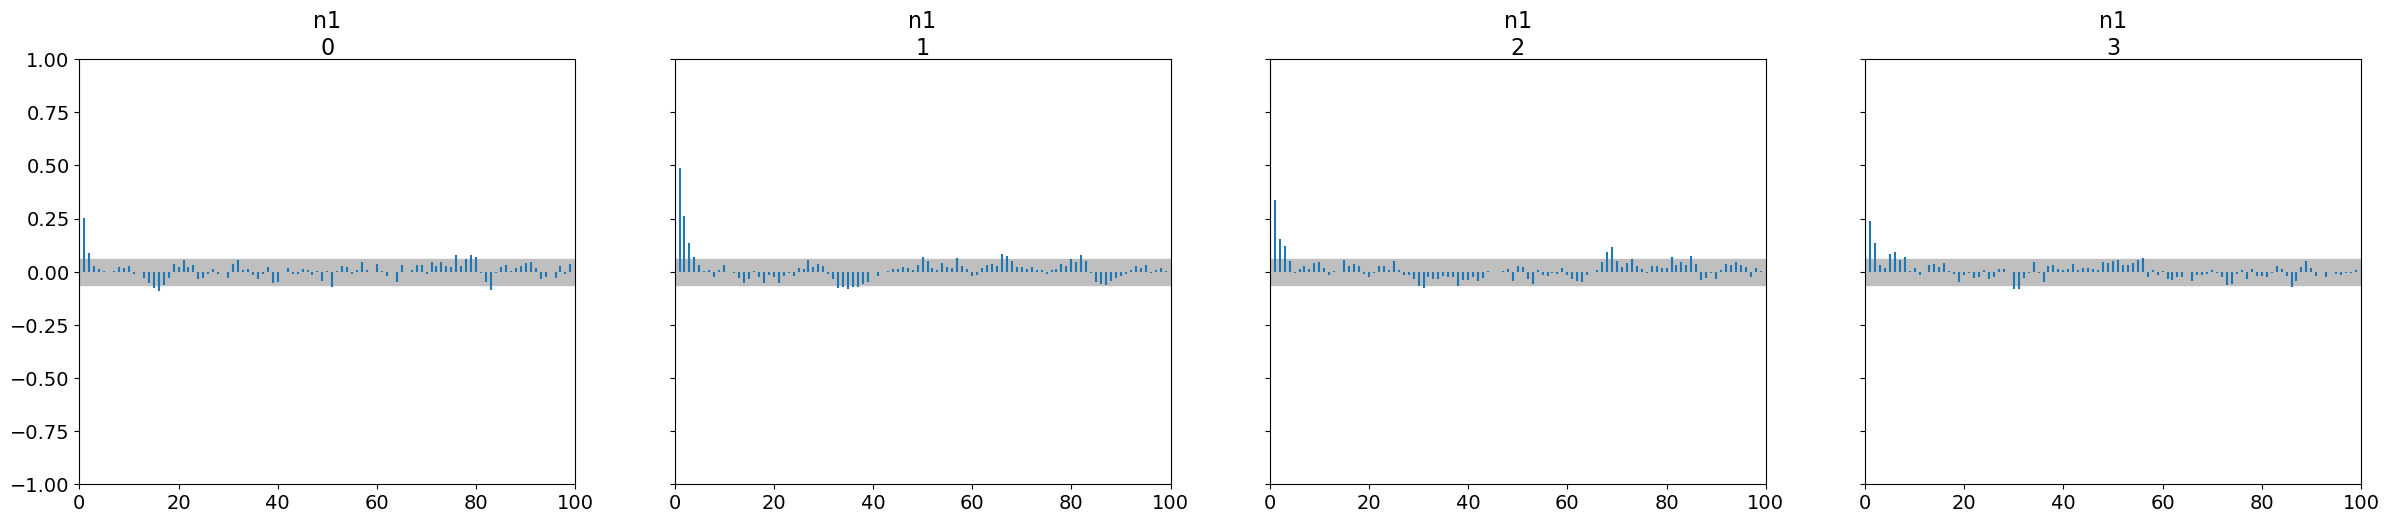

In [80]:
az.plot_autocorr(idata)

In [ ]:
az.plot_autocorr(idata)

In [154]:
y_obs = [1,8,2,7,4,5]
with pm.Model() as model:
    alpha = pm.HalfNormal("alpha",10)
    beta = pm.HalfNormal("beta",10)
    y = pm.Cauchy("y", alpha=alpha,beta=beta, observed=y_obs)
    step = pm.NUTS()
    idata = pm.sample(2000, tune=1000, init=None, step=step, cores=4,return_inferencedata=True)
    #prior_predict = pm.sample_prior_predictive(idata,return_inferencedata=True)
    posterior_predict = pm.sample_posterior_predictive(idata,return_inferencedata=True)
    

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.
Sampling: [alpha, beta, y]


TypeError: 'InferenceData' object cannot be interpreted as an integer

In [155]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [152]:
predict

Inference data with groups:
	> posterior_predictive
	> observed_data

/home/netphaadmin/anaconda3/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


<AxesSubplot:title={'center':'y'}>

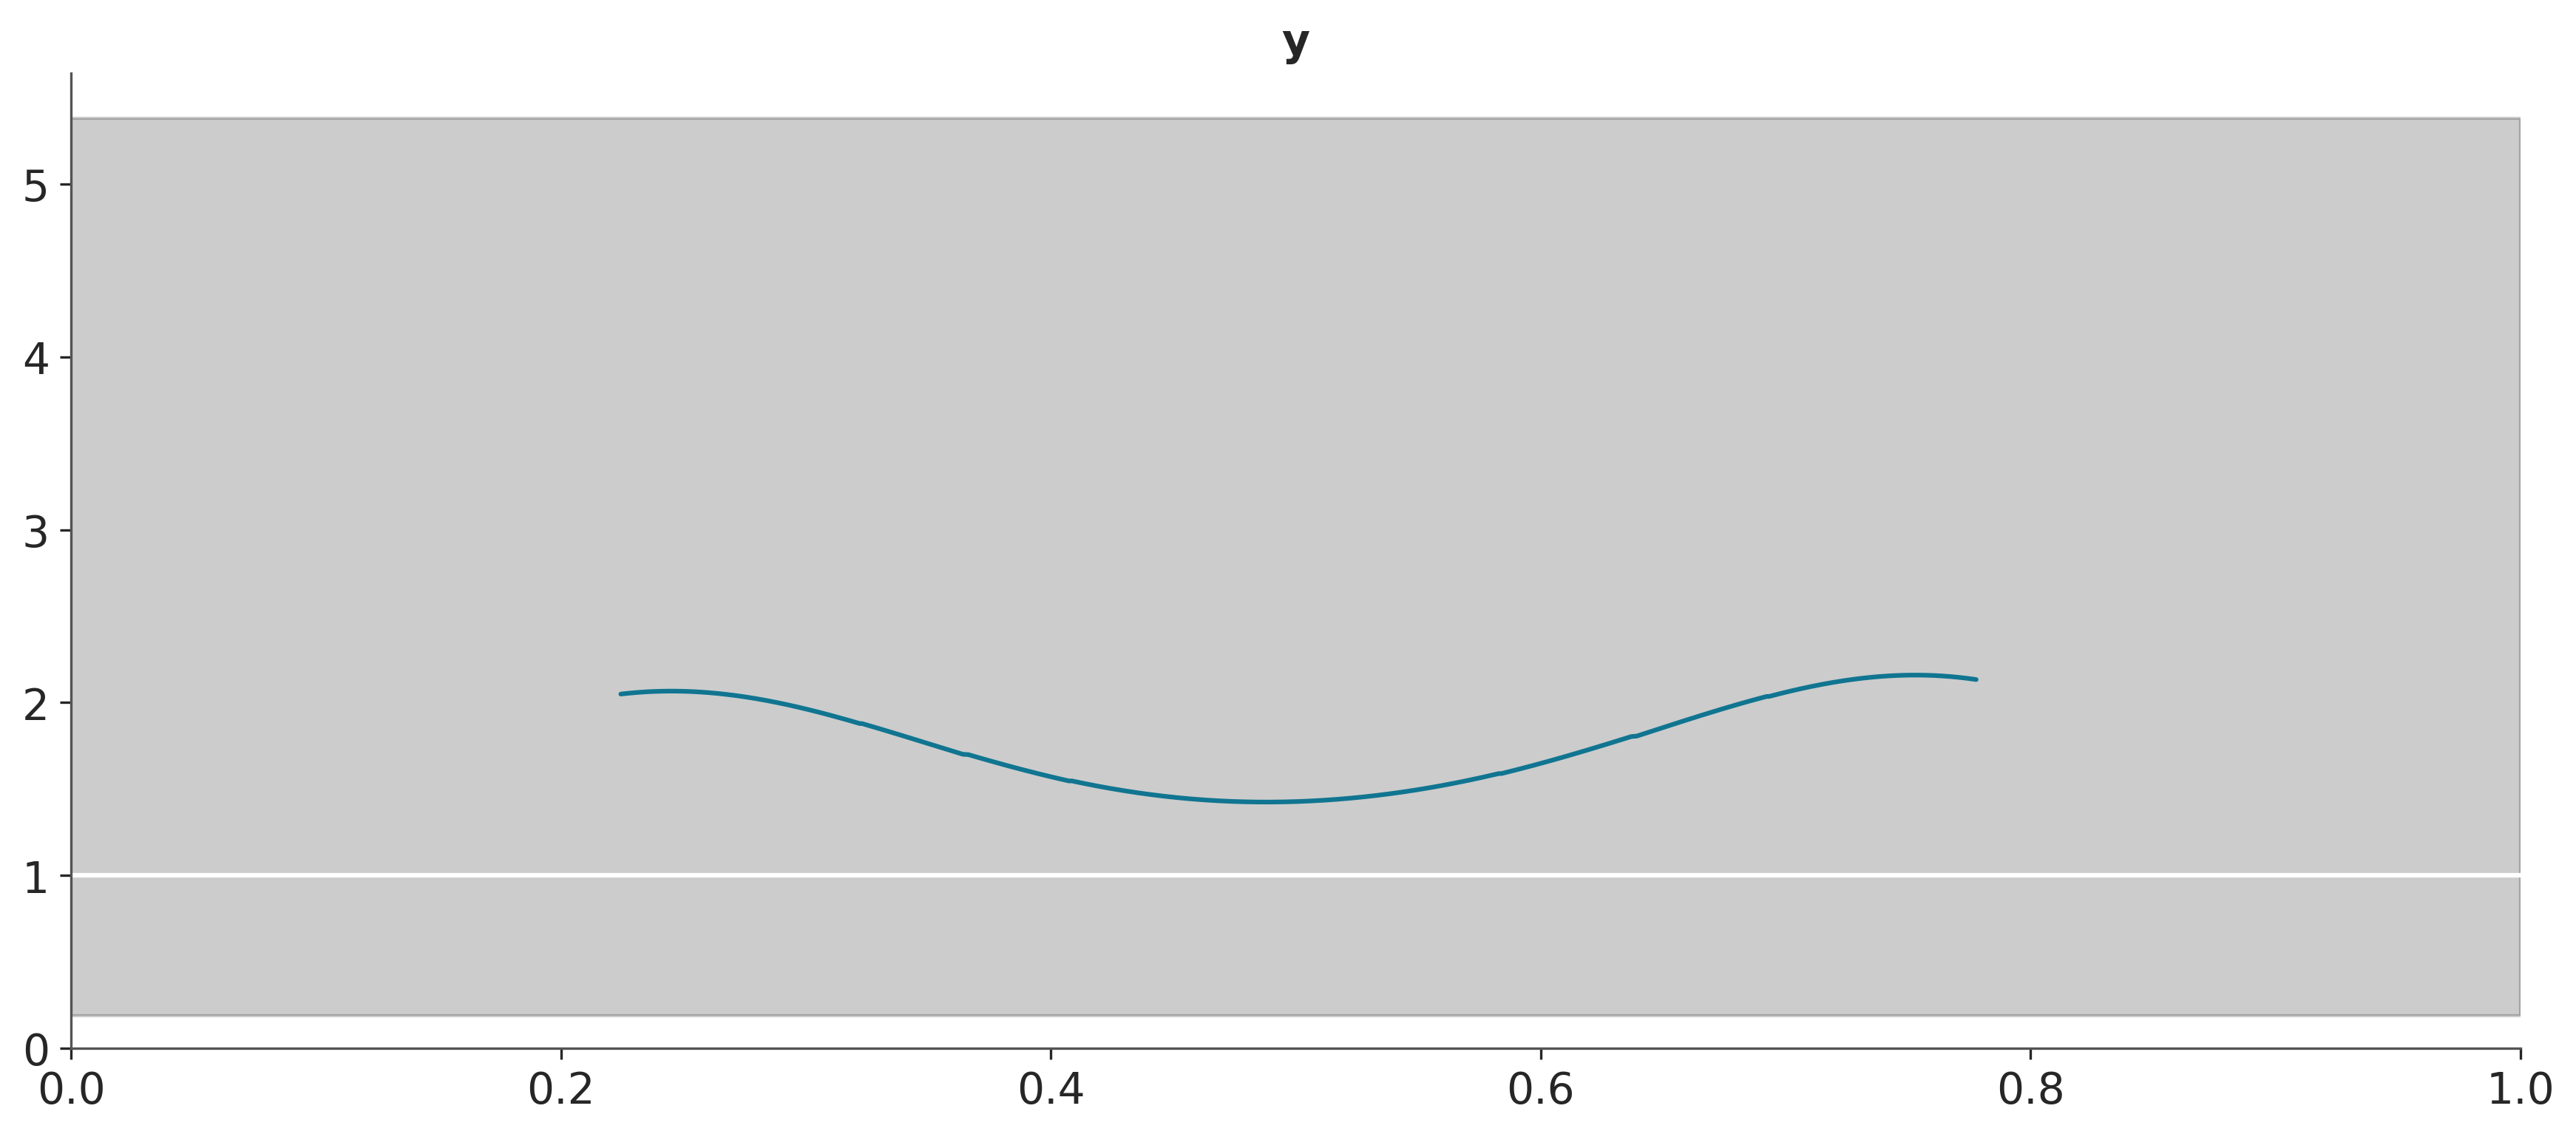

In [164]:
az.plot_bpv(predict)

(-10.0, 10.0)

/home/netphaadmin/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


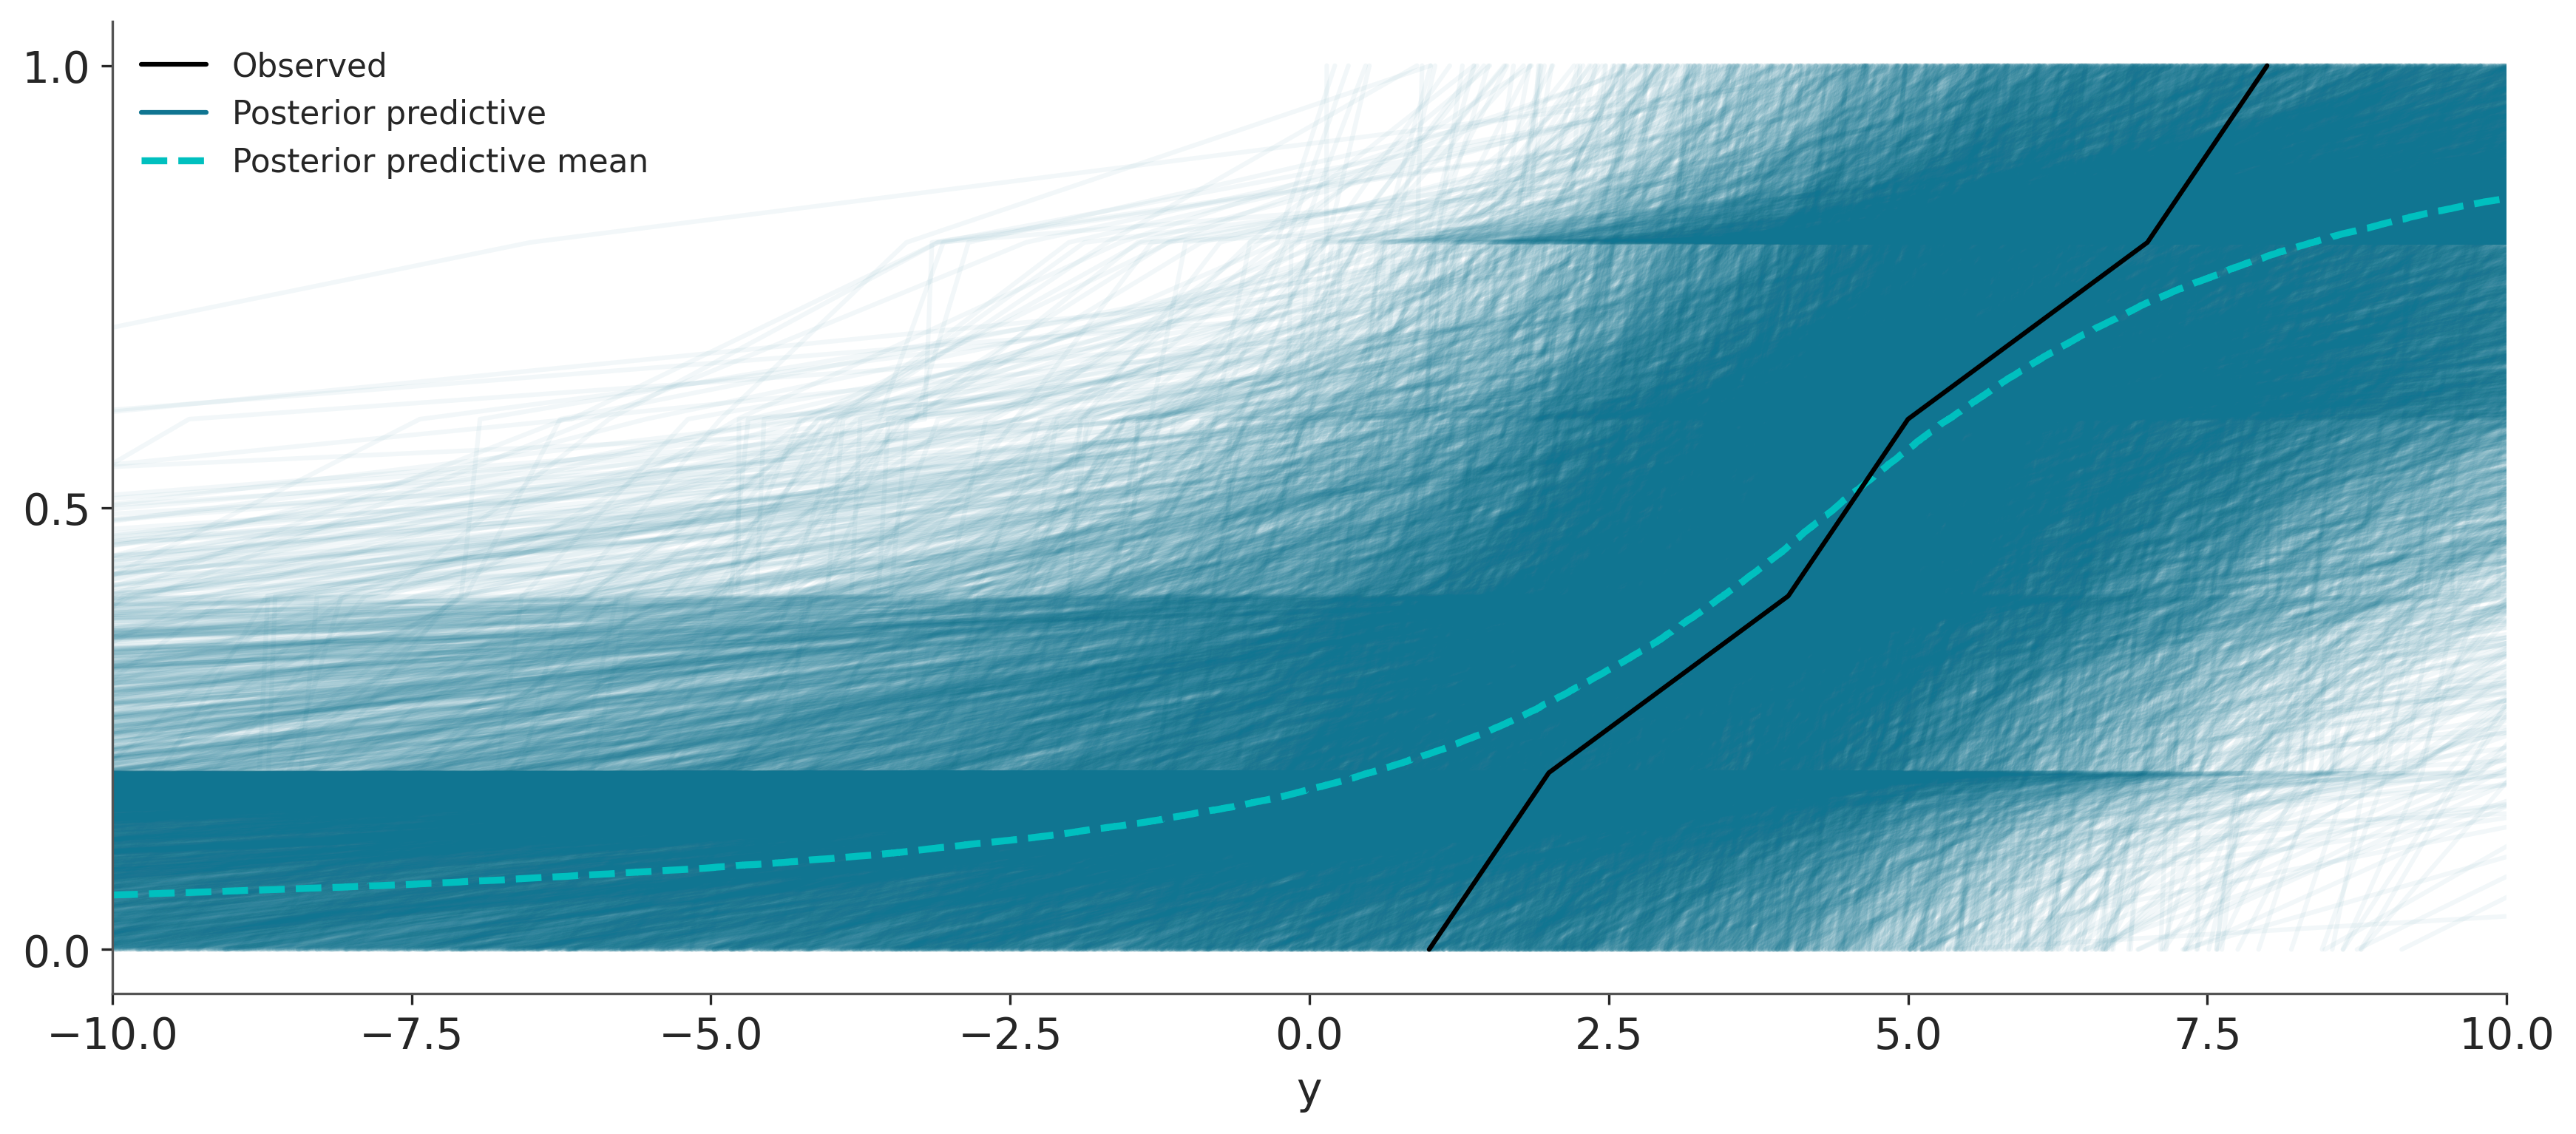

In [160]:
az.plot_ppc(predict, alpha=0.05, kind="cumulative", textsize=14)
plt.xlim(-10,10)

In [163]:
az.summary(idata)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  4.384  1.603   1.185    7.278      0.031    0.022    2681.0    1355.0   
beta   2.922  1.650   0.660    5.843      0.026    0.019    4033.0    3899.0   

       r_hat  
alpha    1.0  
beta     1.0

array([<AxesSubplot:title={'center':'alpha'}>,
       <AxesSubplot:title={'center':'beta'}>], dtype=object)

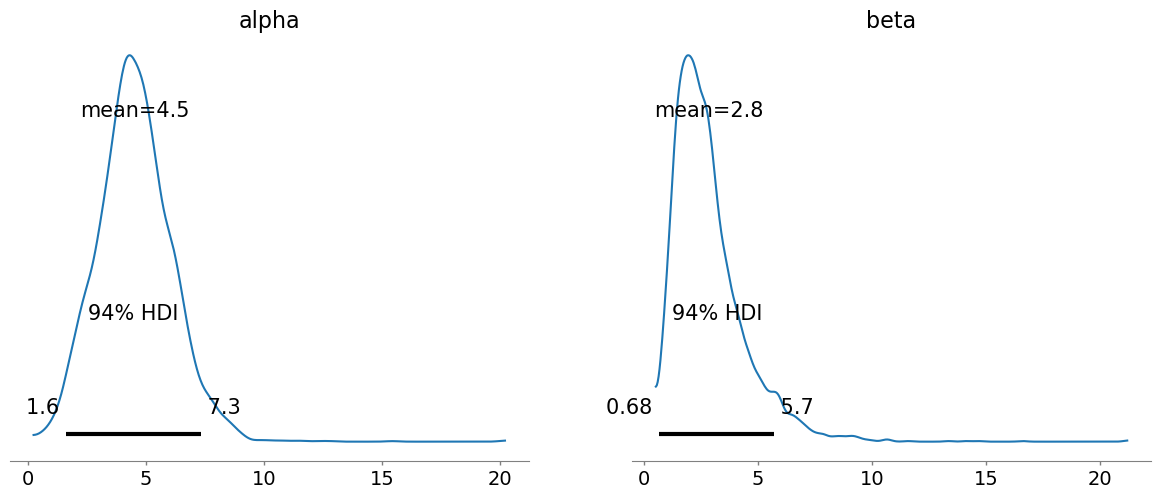

In [91]:
az.plot_posterior(idata)

/home/netphaadmin/anaconda3/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


<AxesSubplot:xlabel='alpha', ylabel='beta'>

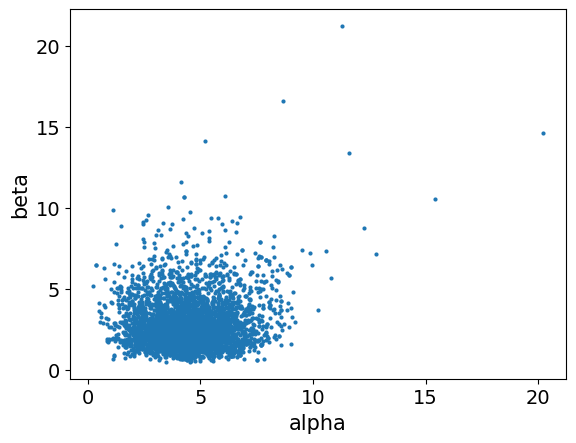

In [92]:
az.plot_pair(idata,divergences=True)

In [95]:
az.plot_kde(idata)

ValueError:  Inference Data object detected. Use plot_posterior or plot_pair instead of plot_kde

/home/netphaadmin/anaconda3/lib/python3.9/site-packages/arviz/plots/backends/matplotlib/forestplot.py:239: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "label_idxs" failed type inference due to: Untyped global name 'defaultdict': Cannot determine Numba type of <class 'type'>

File "anaconda3/lib/python3.9/site-packages/arviz/plots/backends/matplotlib/forestplot.py", line 244:
        def label_idxs():
            <source elided>
                sub_labels, sub_idxs, _, _ = plotter.labels_ticks_and_vals()
                labels_to_idxs = defaultdict(list)
                ^

  @conditional_jit(forceobj=True, nopython=False)


ValueError: Failed in object mode pipeline (step: remove phis nodes)
Cannot add edge as dest node 172 not in nodes {96, 162, 163, 140, 78, 15, 16, 18, 54, 56, 94}

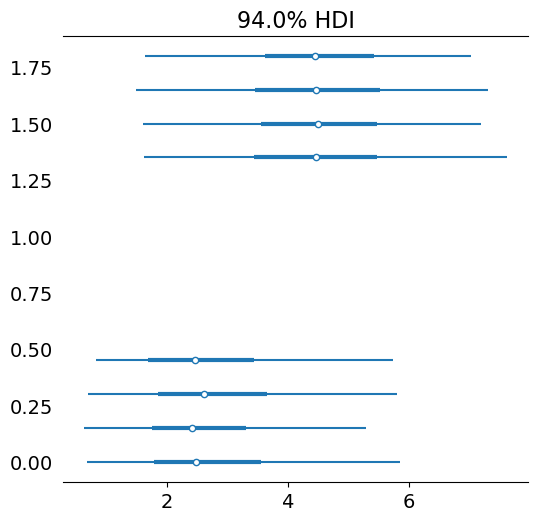

In [93]:
az.plot_forest(idata)

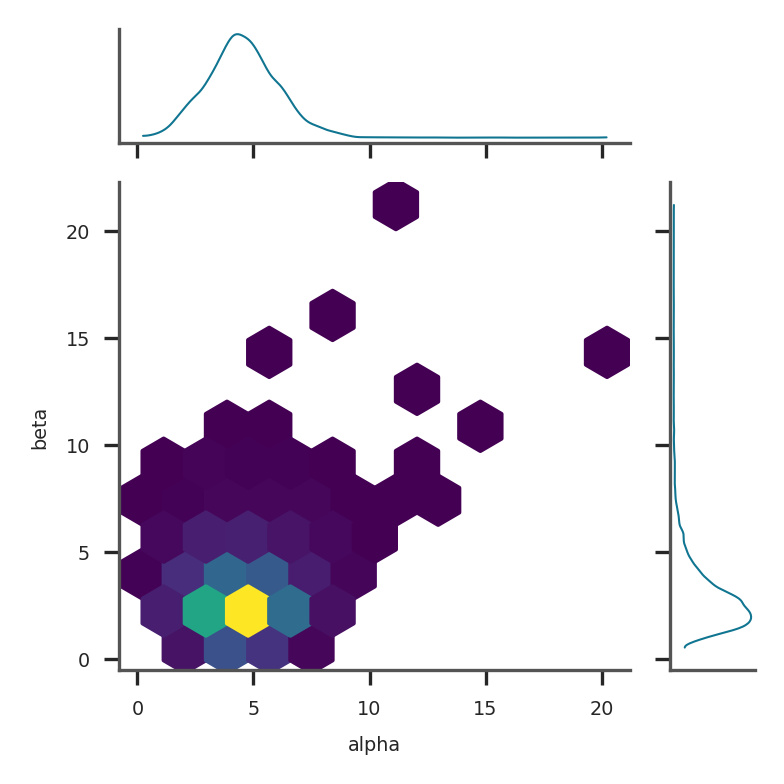

In [101]:
az.style.use("arviz-doc")

#data = az.load_arviz_data("non_centered_eight")

az.plot_pair(
    idata,
    kind="hexbin",
    marginals=True,
    figsize=(2.5, 2.5),
)
plt.show()

/home/netphaadmin/anaconda3/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


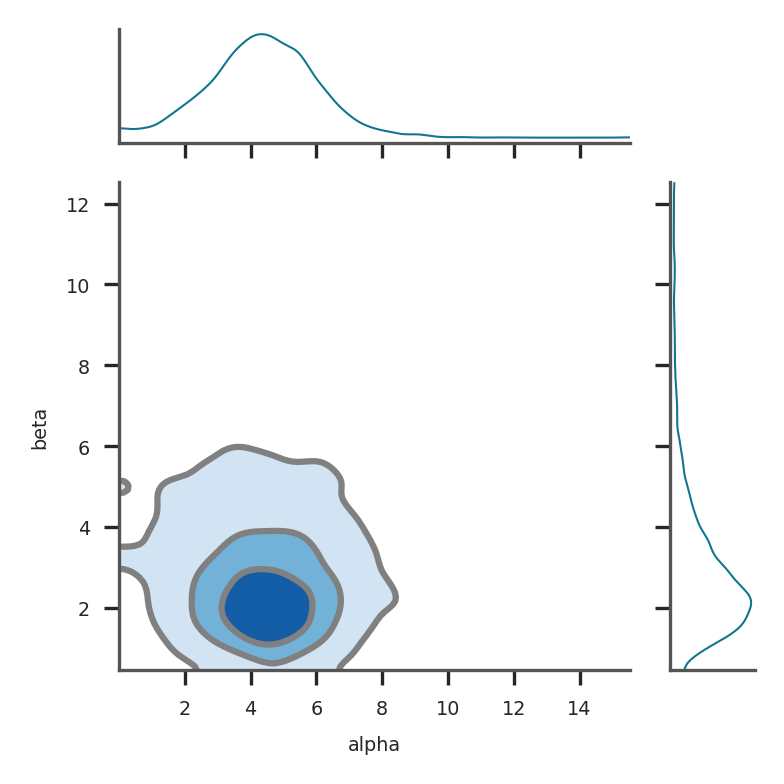

In [115]:
az.style.use("arviz-doc")

#data = az.load_arviz_data("non_centered_eight")

az.plot_pair(
    idata,
    kind="kde",
    marginals=True,
    kde_kwargs={ "hdi_probs": [0.3, 0.6, 0.9], "contourf_kwargs": {"cmap": "Blues"}},
    figsize=(2.5, 2.5))
plt.show()

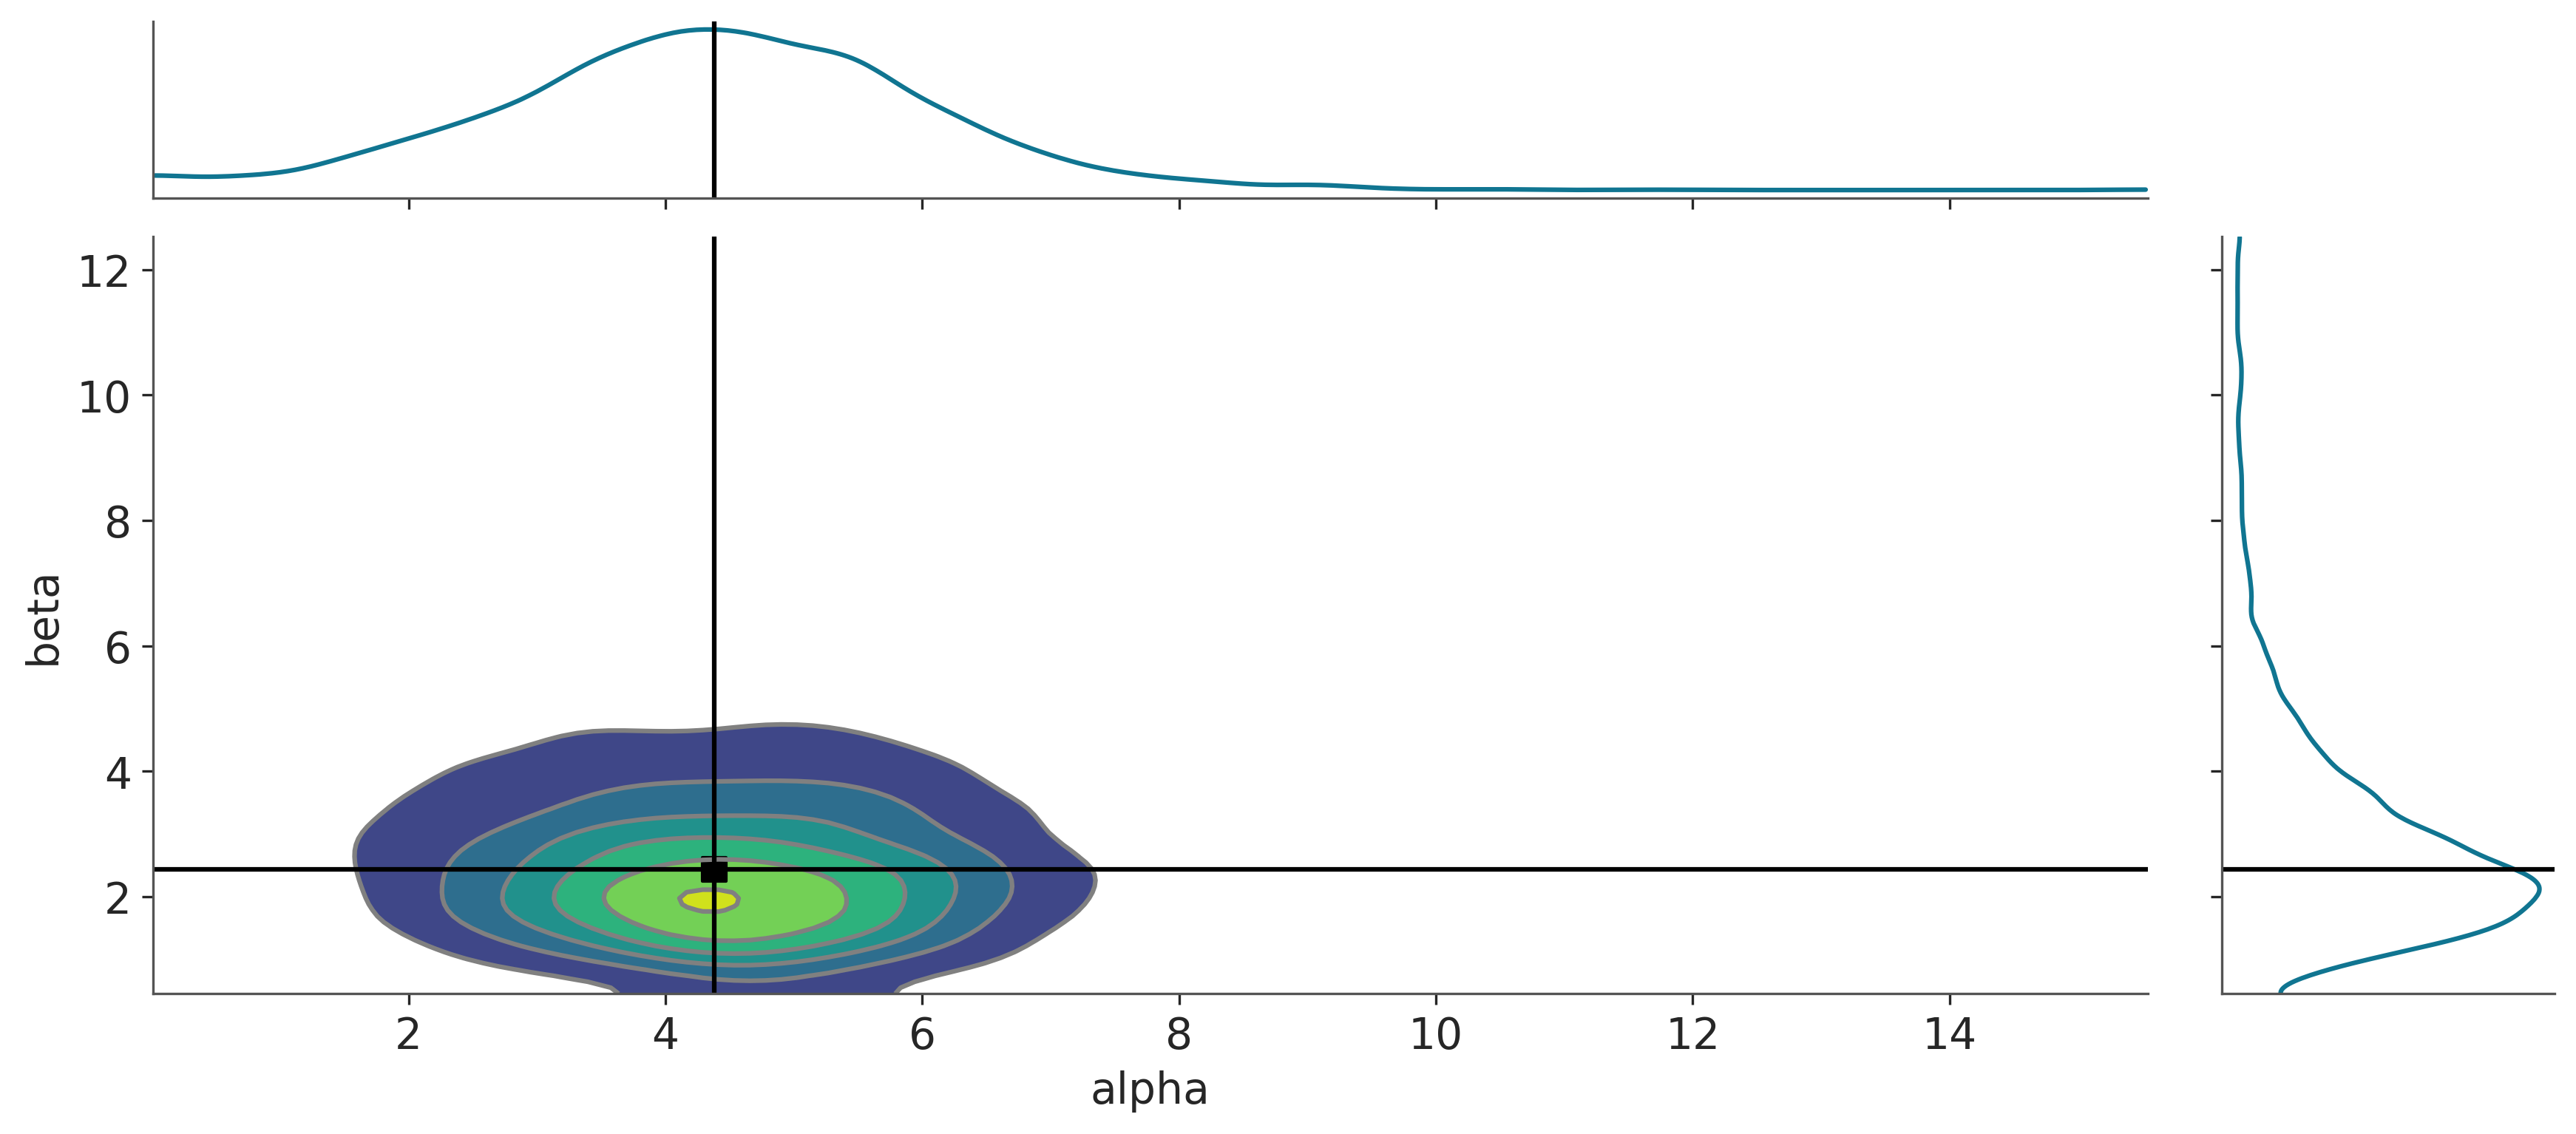

In [118]:
az.plot_pair(
    idata,
    kind="kde",
    kde_kwargs={"fill_last": False},
    marginals=True,
    #coords=coords,
    point_estimate="median")
   # figsize=(2.5, 2.5))
plt.show()

In [123]:
az.plot_bpv(pm.sample_posterior_predictive(idata)["alpha"])

TypeError: No model on context stack.

In [124]:
pm.sample_posterior_predictive(idata)["alpha"]

TypeError: No model on context stack.

In [ ]:
    coords=coords,
    point_estimate="median",

In [98]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [106]:
y_obs = [1,8,2,7,4,5]
with pm.Model() as model_gauss:
    mu = pm.Normal("mu",0,10)
    sigma= pm.HalfNormal("sigma",10)
    y = pm.Normal("y", mu=mu,sigma=sigma, observed=y_obs)
    idata = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


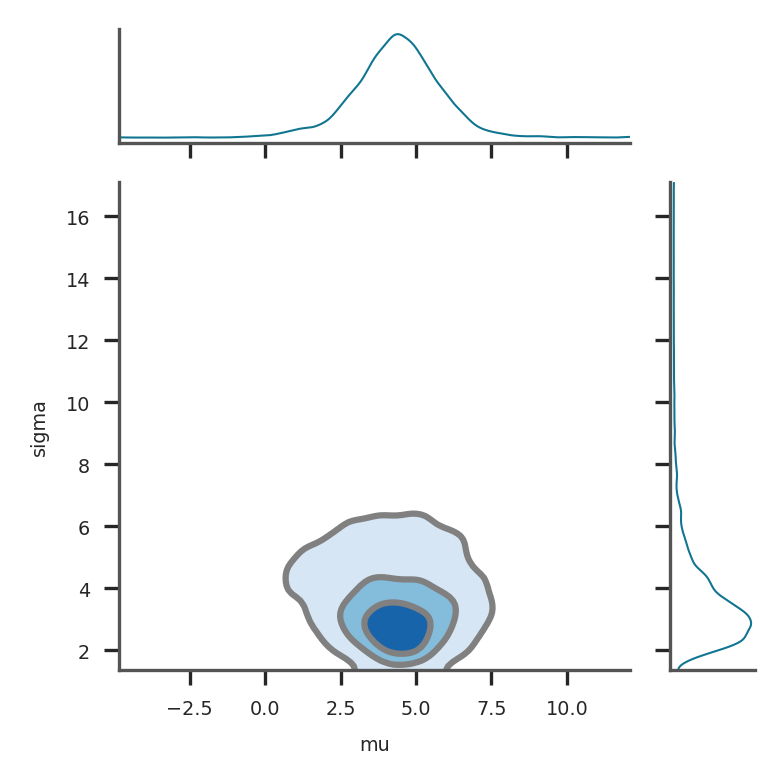

In [113]:
az.style.use("arviz-doc")

#data = az.load_arviz_data("non_centered_eight")

az.plot_pair(
    idata,
    kind="kde",
    marginals=True,
    kde_kwargs={ "hdi_probs": [0.3, 0.6, 0.9], "contourf_kwargs": {"cmap": "Blues"}},
    figsize=(2.5, 2.5))
plt.show()

<AxesSubplot:xlabel='mu', ylabel='sigma'>

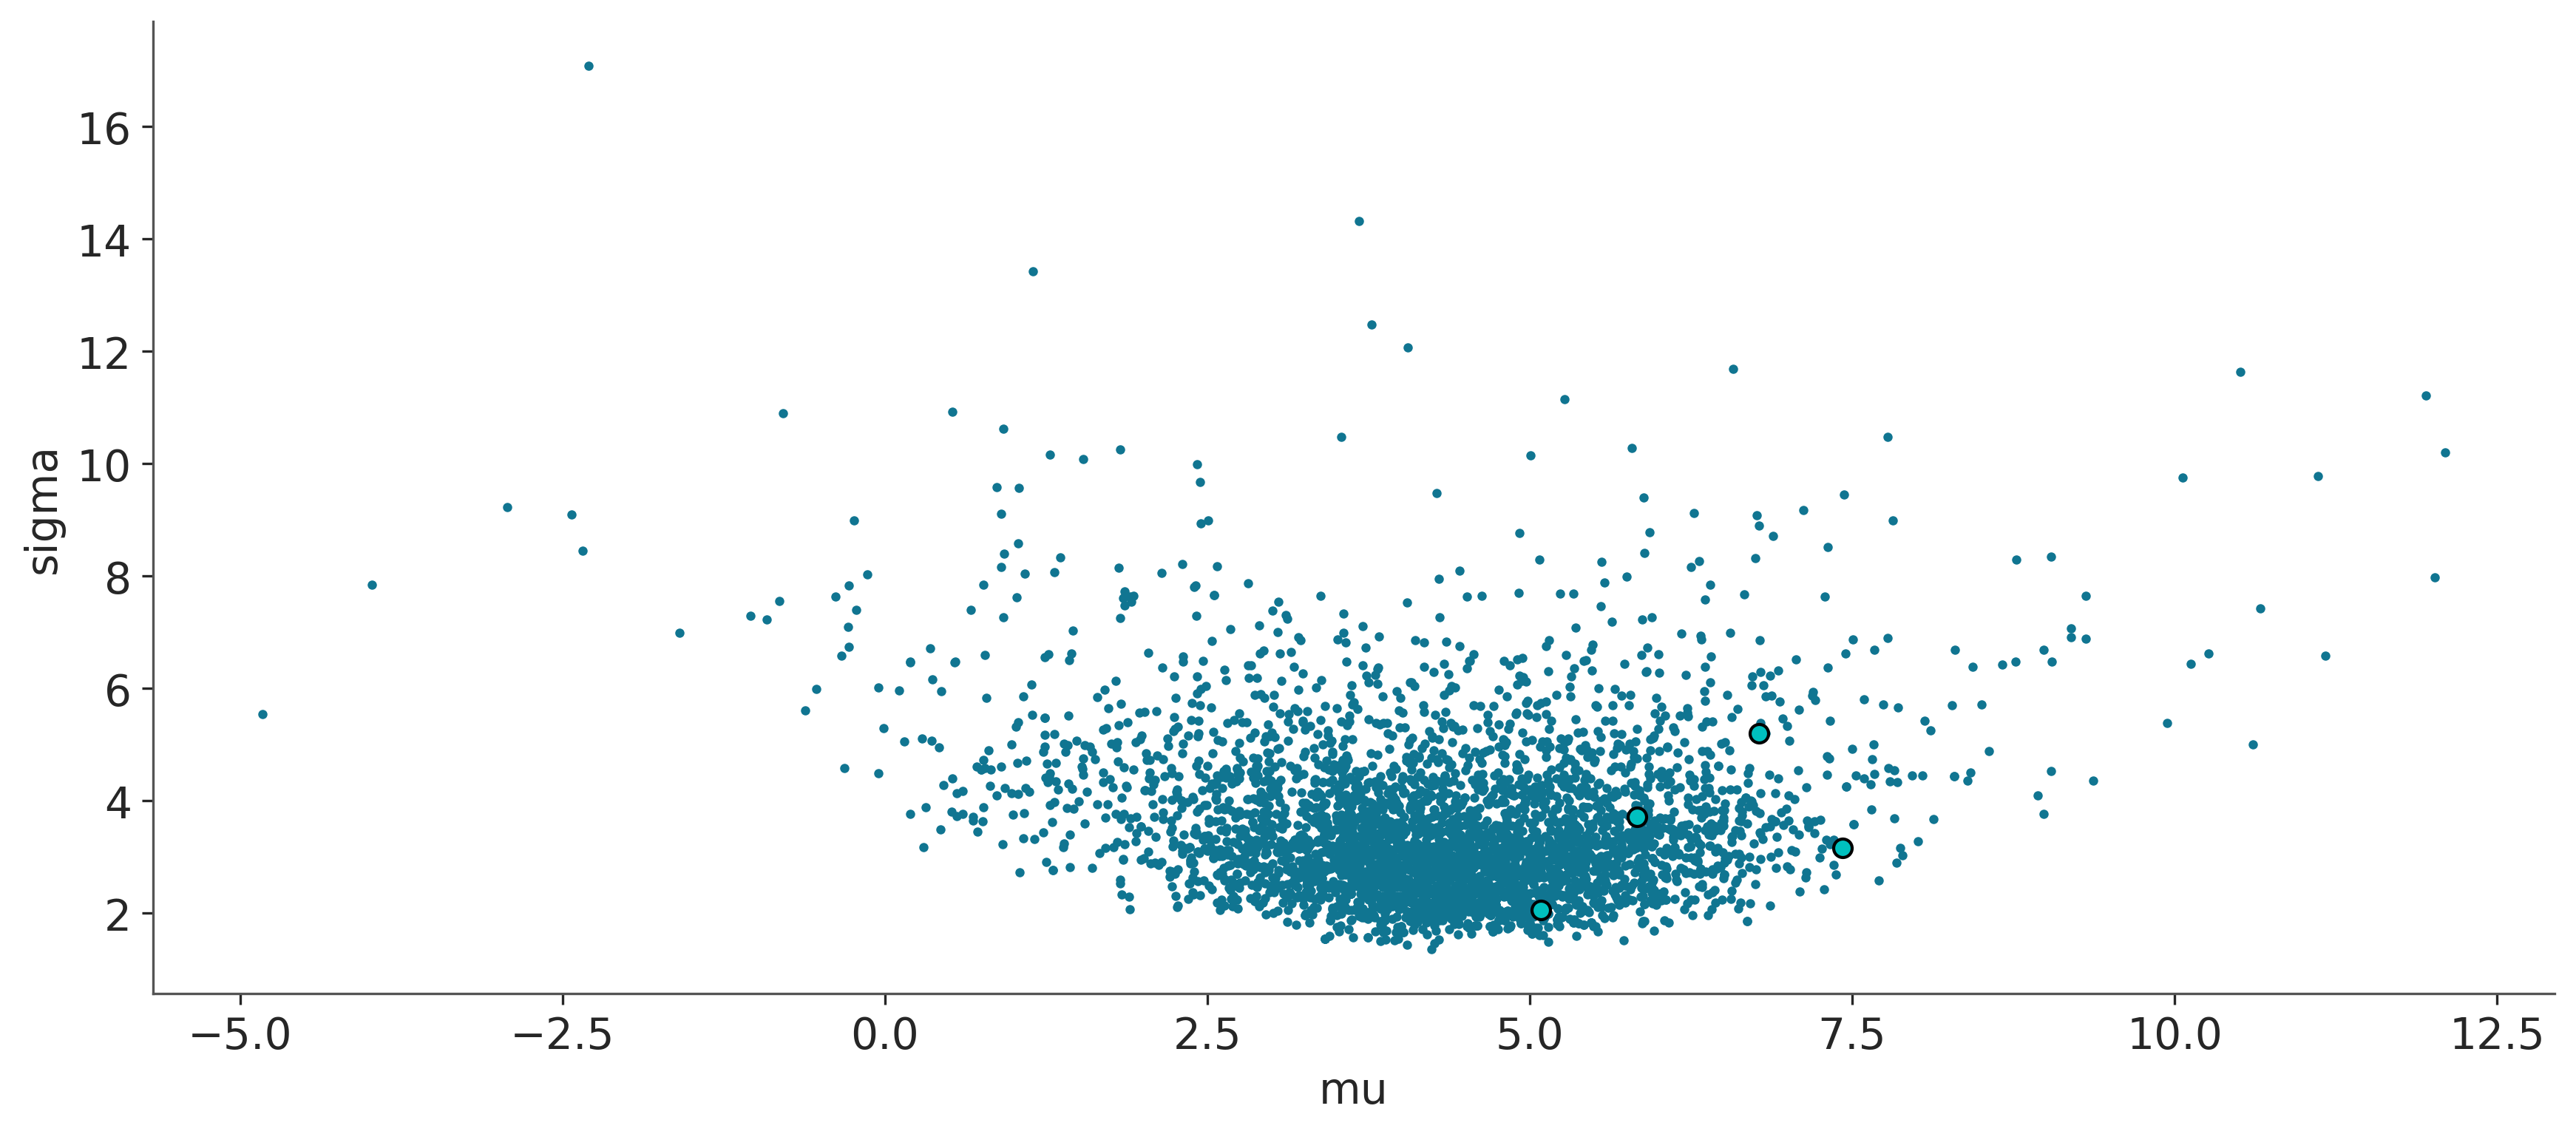

In [108]:
az.plot_pair(idata,divergences=True)